# Домашнее задание № 1
## Данные Росстата, 2011 год
## Часть 1


Загрузим необходимые библиотеки:

In [1]:
library(ggplot2)
library(readxl)
library(tidyverse)
library(nortest) 
library(stats)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.0     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### 1.

Выгрузим данные из заранее подготовленного эксель файла.

In [2]:
df <- read_excel("data.xlsx")

In [3]:
head(df)

Regions,GRP,Unemployment_2010,Unemployment_2011
<chr>,<dbl>,<dbl>,<dbl>
Белгородская область,111.0,5.2,4.4
Брянская область,108.2,8.0,7.1
Владимирская область,102.9,6.2,5.8
Воронежская область,111.4,7.5,6.6
Ивановская область,100.6,7.6,6.6
Калужская область,112.9,6.5,5.6


* __GRP__ — Индекс физического объема валового регионального продукта (в постоянных ценах; в процентах к предыдущему году).
* __Unemployment_2010__ — уровень безработицы в 2010 году.
* __Unemployment_2011__ — уровень безработицы в 2011 году.

Есть ли пропуски в датафрейме?

In [4]:
any(is.na(df))

[1] FALSE

Теперь определим переменные:
* $X$ — прирост ВПР (в процентах)
* $Y$ — изменение уровня безработицы (в процентах)

In [5]:
df$GRP <- df$GRP - 100

In [6]:
df <- df %>% 
  rename(X = GRP)

In [7]:
df$Y <- df$Unemployment_2011 - df$Unemployment_2010

Удалим лишние столбцы.

In [8]:
df <- subset(df, select = -c(Unemployment_2010, Unemployment_2011))

В итоге получили следующий датафрейм:

In [9]:
head(df)

Regions,X,Y
<chr>,<dbl>,<dbl>
Белгородская область,11.0,-0.8
Брянская область,8.2,-0.9
Владимирская область,2.9,-0.4
Воронежская область,11.4,-0.9
Ивановская область,0.6,-1.0
Калужская область,12.9,-0.9


### 2. Дескриптивные статистики

In [10]:
summary(df)

   Regions                X                Y          
 Length:83          Min.   :-11.30   Min.   :-6.4000  
 Class :character   1st Qu.:  3.65   1st Qu.:-1.3000  
 Mode  :character   Median :  5.70   Median :-0.9000  
                    Mean   :  5.51   Mean   :-0.9108  
                    3rd Qu.:  7.85   3rd Qu.:-0.5000  
                    Max.   : 13.30   Max.   : 2.6000  

Как видим, максимальный прирост ВРП составил $13.3 \%$, а в худшем случае прирост ВРП составлял $-11.3 \%$. Выборочное среднее прироста ВПР равняется $5.494\%$.

Стандартное отклонение прироста ВРП:

In [11]:
round(sd(df$X), digits=2)

[1] 3.53

Касательно уровня безработицы можно заметить, что в наилучшем варианте она упала на $6.7\%$, а в нихудшем — выросла на $1.1\%$. Выборочное среднее изменения уровня безработицы составило $-0.4683\%$

Стандартное отклонение изменения уровня безработицы:

In [12]:
round(sd(df$Y), digits=2)

[1] 1.08

### 3. Гистограмма

#### Для переменной Y

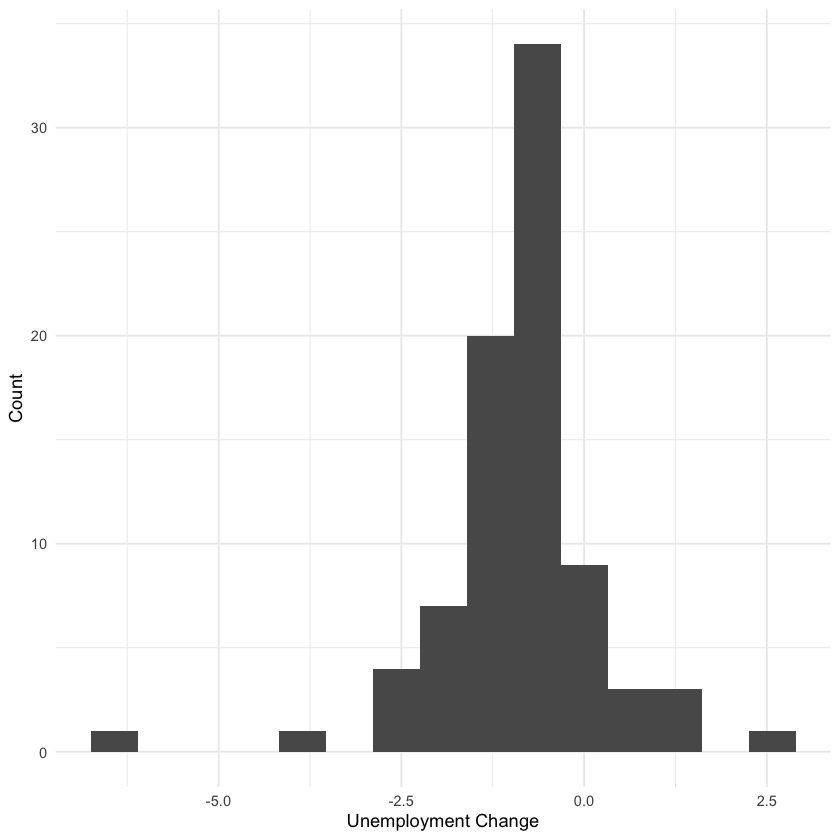

In [13]:
ggplot(df, aes(x = Y)) +
    geom_histogram(bins=15, position = "stack") + 
    theme_minimal() +
    labs(
    x = "Unemployment Change",
    y = "Count"
    )

#### Для переменной X

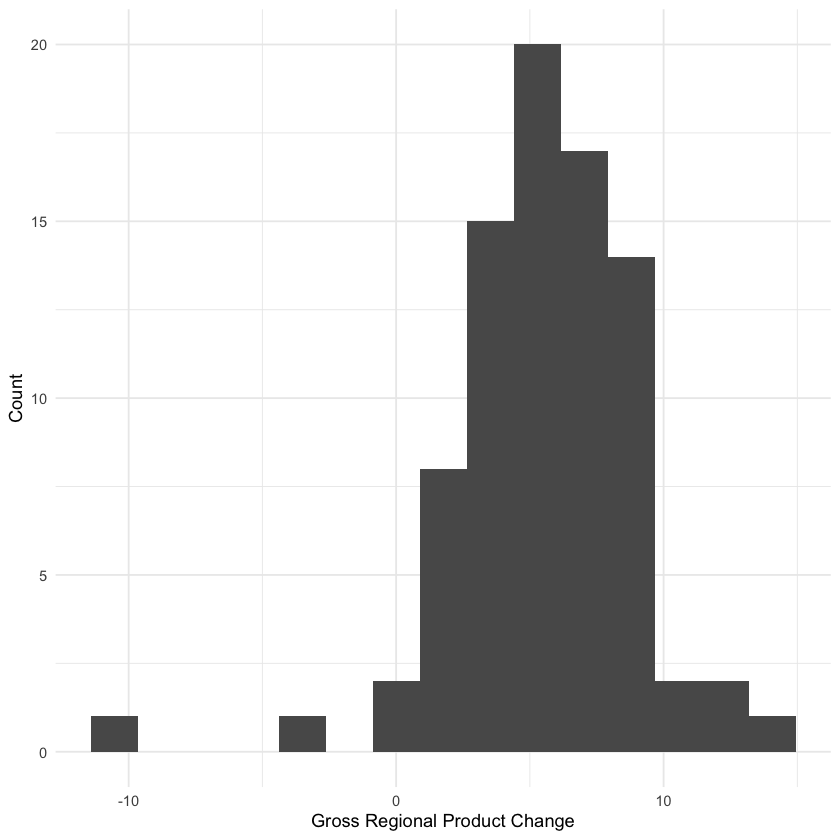

In [14]:
ggplot(df, aes(x = X)) +
    geom_histogram(bins=15, position = "stack") + 
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Count"
    )

### Ремарка 
Прежде чем перейти к тестированию гипотезы, проверим, можно ли утверждать, что $Y$ и $X$ распределены нормально. От этого зависит, какую тестовую статистку мы будем использовать.

#### Переменная Y

\begin{cases}
H_0: Y \text{ распределено нормально} \\
H_a: Y \text{ не распределено нормально}
\end{cases}

Воспользуемся критерием согласия Шапиро-Уилка:

In [15]:
shapiro.test(df$Y)


	Shapiro-Wilk normality test

data:  df$Y
W = 0.86378, p-value = 3.271e-07


Критерием согласия Андерсона-Дарлинга:

In [16]:
ad.test(df$Y)


	Anderson-Darling normality test

data:  df$Y
A = 2.7931, p-value = 4.325e-07


Поскольку p-value очень низкое, $H_0$ отвергается при любом разумном уровне значимости. 

 #### Переменная X

\begin{cases}
H_0: X \text{ распределено нормально} \\
H_a: X \text{ не распределено нормально}
\end{cases}

Воспользуемся критерием согласия Шапиро-Уилка:

In [17]:
shapiro.test(df$X)


	Shapiro-Wilk normality test

data:  df$X
W = 0.91096, p-value = 2.662e-05


Критерием Андерсона-Дарлинга:

In [18]:
ad.test(df$X)


	Anderson-Darling normality test

data:  df$X
A = 1.1404, p-value = 0.005231


Поскольку p-value очень низкое, $H_0$ отвергается при любом разумном уровне значимости. 

#### Вывод

В данном случае мы не можем использовать $t$-статистику для наших гипотез. Будем использовать ЦПТ — можем ей воспользоваться, поскольку выборка достаточно большая, — и теорему Слуцкого.

In [19]:
n = nrow(df)
n

[1] 83

### 4.


Пусть существует последовательность $\{Y_i\}_{i=1}^{n},\ Y_i \sim \mathscr{F} \ $с $\ \mathbb{E}(Y_i) < \infty \ $ и $\ \text{Var}(Y_i) < \infty \ $

По ЦПТ и теореме Слуцкого:

$$
z_{obs}
=
\dfrac{\overline{Y}_n - \mu_0}{\dfrac{\hat{\sigma}_Y}{\sqrt{n}}} \xrightarrow[n \to \infty]{d}  \mathcal{N}(0, 1)
$$ 

Проведем проверку двусторонней гипотезы, что математическое ожидание $Y$ равно изменению уровня безработицы для Российской Федерации в 2011 году ($U_{2011} - U_{2010} = 6.5-7.3=-0.8$).
\begin{cases}
H_0: \mu_0 = -0.8 \\
H_a: \mu_0 \neq -0.8
\end{cases}





In [20]:
mu_0 <- -0.8
mu_hat <- mean(df$Y)
sd_hat <- sd(df$Y)

Значение тестовой статистики:

In [21]:
z_obs <- (mu_hat - mu_0) / (sd_hat / sqrt(n))
z_obs

[1] -0.9314546

In [22]:
alpha <- c(0.1, 0.05, 0.01)
z_crit <- qnorm(1 - alpha/2)

for (i in 1:3) {
    if (-z_crit[i] < z_obs && z_obs < z_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 не отвергается при уровне значимости 0.10
H_0 не отвергается при уровне значимости 0.05
H_0 не отвергается при уровне значимости 0.01


Следовательно, гипотеза $H_0$ не отвергается при любом разумном уровне значимости.

### 5.

Пусть существует последовательность $\{X_i\}_{i=1}^{n},\ X_i \sim \mathscr{F} \ $с $\ \mathbb{E}(X_i) < \infty \ $ и $\ \text{Var}(X_i) < \infty \ $

$$
z_{obs}
= 
\dfrac{\overline{X}_n - \mu_0}{\dfrac{\hat{\sigma}_{X}}{\sqrt{n}}} \xrightarrow[n \to \infty]{d} \mathcal{N}(0, 1)
$$ 

Проведем проверку односторонней гипотезы, что математическое ожидание $X$ равно приросту ВРП для Российской Федерации в 2011 году.
\begin{cases}
H_0: \mu_0 = 5.4 \\
H_a: \mu_0 < 5.4
\end{cases}

In [23]:
mu_0 <- 5.4
mu_hat <- mean(df$X)
sd_hat <- sd(df$X)

Значение тестовой статистики:

In [24]:
z_obs <- (mu_hat - mu_0) / (sd_hat / sqrt(n))
z_obs

[1] 0.2828678

In [25]:
alpha <- c(0.1, 0.05, 0.01)
z_crit <- qnorm(1 - alpha)

for (i in 1:3) {
    if (z_obs > z_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 отвергается при уровне значимости 0.10
H_0 отвергается при уровне значимости 0.05
H_0 отвергается при уровне значимости 0.01


Следовательно, гипотеза $H_0$ отвергается при любом разумном уровне значимости.

### Предположение о нормальности распределения $Y$ и $X$

Если мы предположим нормальность распределения наших переменных — хотя по критериям согласиям мы получили, что это не так, — то мы можем использовать $t$-статистику, поскольку истинная дисперсия переменных нам не известна.

#### Переменная $Y$

$\{Y_i\}_{i=1}^{n},\ Y_i \sim \mathcal{N}(\mu, \sigma_Y^2),\ \sigma_Y^2$ __не известна__.

$$
t_{obs} 
=
\dfrac{\overline{Y}_n - \mu_0}{\dfrac{\hat{\sigma}_Y}{\sqrt{n}}} \stackrel{H_0}{\sim} t(n - 1)
$$

Проведем проверку двусторонней гипотезы, что математическое ожидание $Y$ равно изменению уровня безработицы для Российской Федерации в 2011 году.
\begin{cases}
H_0: \mu_0 = -0.8 \\
H_a: \mu_0 \neq -0.8
\end{cases}


In [26]:
mu_0 <- -0.8
mu_hat <- mean(df$Y)
sd_hat <- sd(df$Y)

In [27]:
t_obs <- (mu_hat - mu_0) / (sd_hat / sqrt(n))
t_obs

[1] -0.9314546

In [28]:
alpha <- c(0.1, 0.05, 0.01)
t_crit <- qt(1 - alpha/2, df = n - 1)

for (i in 1:3) {
    if (-t_crit[i] < t_obs && t_obs < t_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 не отвергается при уровне значимости 0.10
H_0 не отвергается при уровне значимости 0.05
H_0 не отвергается при уровне значимости 0.01


Следовательно, гипотеза $H_0$ не отвергается при любом разумном уровне значимости.

#### Переменная $X$

$\{X_i\}_{i=1}^{n},\ X_i \sim \mathcal{N}(\mu, \sigma_X^2),\ \sigma_X^2$ __не известна__.

$$
t_{obs} 
=
\dfrac{\overline{X}_n - \mu_0}{\dfrac{\hat{\sigma}_X}{\sqrt{n}}} \stackrel{H_0}{\sim} t(n - 1)
$$

Проведем проверку односторонней гипотезы, что математическое ожидание $X$ равно приросту ВРП для Российской Федерации в 2011 году.
\begin{cases}
H_0: \mu_0 = 5.4 \\
H_a: \mu_0 < 5.4
\end{cases}

In [29]:
mu_0 <- 5.4
mu_hat <- mean(df$X)
sd_hat <- sd(df$X)

In [30]:
t_obs <- (mu_hat - mu_0) / (sd_hat / sqrt(n))
t_obs

[1] 0.2828678

In [31]:
alpha <- c(0.1, 0.05, 0.01)
t_crit <- qt(1 - alpha, df = n - 1)

for (i in 1:3) {
    if (t_obs > t_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 отвергается при уровне значимости 0.10
H_0 отвергается при уровне значимости 0.05
H_0 отвергается при уровне значимости 0.01


Следовательно, гипотеза $H_0$ отвергается при любом разумном уровне значимости.

## Часть 2

### 1. Диаграмма рассеяния $Y$ от $X$

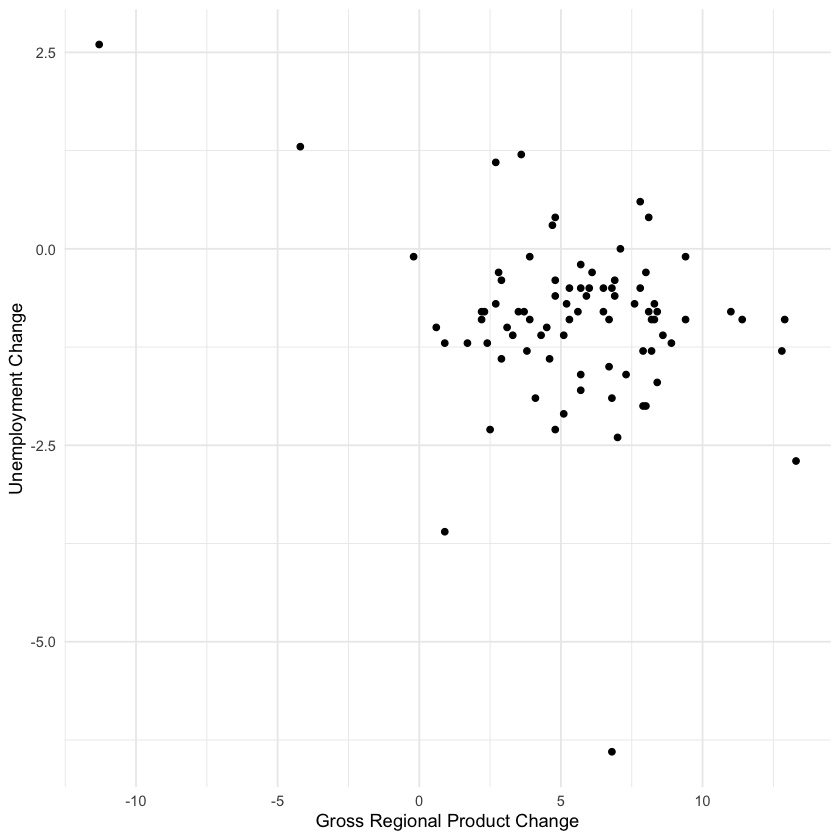

In [32]:
ggplot(df, aes(X, Y)) + 
    geom_point() + 
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Unemployment Change"
    )

Да, в той или иной мере зависимость похожа на линейную.

### 2. Линейная регрессионная модель Y на X

Имеем стандартную регрессионную модель:

$Y_i = \beta_0 + \beta_1X_i + \varepsilon_i$, $i \in \overline{1, n}$

In [33]:
Y <- df$Y
X <- df$X

Оценим ее:

$\hat Y_i = \hat\beta_0 + \hat\beta_1X_i$

In [34]:
lm <- lm(Y ~ X, data=df)
lm


Call:
lm(formula = Y ~ X, data = df)

Coefficients:
(Intercept)            X  
   -0.38222     -0.09595  


Получили, что $\hat\beta_0 \approx -0.382$, $\hat\beta_1 \approx -0.096$

Выведем полную информацию по линейной регрессии:

In [35]:
summary(lm)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3654 -0.5146  0.1251  0.4922  1.9276 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.38222    0.21169  -1.806  0.07470 . 
X           -0.09595    0.03240  -2.961  0.00402 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.036 on 81 degrees of freedom
Multiple R-squared:  0.09766,	Adjusted R-squared:  0.08652 
F-statistic: 8.766 on 1 and 81 DF,  p-value: 0.004024


Изобразим линейную регрессию:

`geom_smooth()` using formula 'y ~ x'



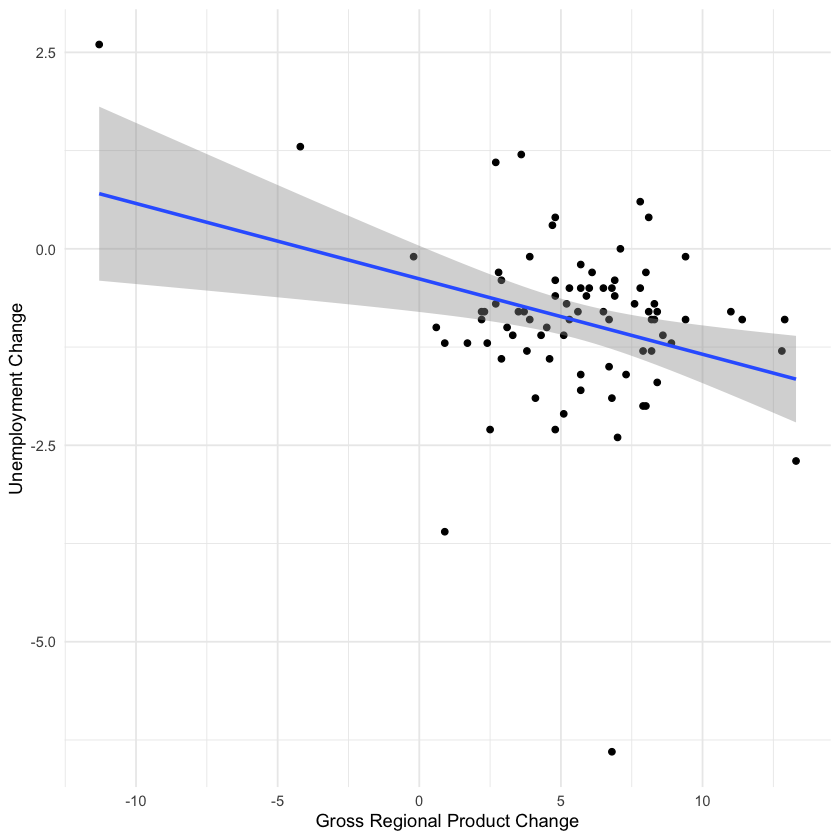

In [36]:
ggplot(df, aes(X, Y)) +
    geom_point() + 
    stat_smooth(method = "lm") +
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Unemployment Change"
    )

### 3. Значимость коэффициентов регрессии

#### Коэффициент $\beta_0$
\begin{cases}
H_0: \beta_0 = 0 \\
H_a: \beta_0 \neq 0
\end{cases}

Поскольку истинная дисперсия оценки $\hat\beta_0$ не известна, используем $t$-статистику:

$$
t_{obs} 
=
\dfrac{\hat\beta_0}{\hat{\sigma}_{\hat\beta_0}} \stackrel{H_0}{\sim} t(n - k)
$$

В нашем случае $k = 2$, так как имеем два параметра для оценки.

$$
t_{obs} 
=
\dfrac{\hat\beta_0}{\hat{\sigma}_{\hat\beta_0}} \stackrel{H_0}{\sim} t(n - 2)
$$

В свою очередь:
$$
\hat{\sigma}^2_{\hat\beta_0} = \hat{\sigma}^2_{\varepsilon}\dfrac{\sum{X^2_i}}{n\sum{(X_i - \bar X)^2}} = \dfrac{RSS}{n - 2} \dfrac{\sum{X^2_i}}{n\sum{(X_i - \bar X)^2}} = \dfrac{\sum{e^2_i}}{n - 2} \dfrac{\sum{X^2_i}}{n\sum{(X_i - \bar X)^2}} = \dfrac{\sum{(Y_i - \hat Y_i)^2}}{n - 2} \dfrac{\sum{X^2_i}}{n\sum{(X_i - \bar X)^2}}
$$


In [37]:
hat_beta_0 <- -0.382
hat_beta_1 <- -0.096
hat_Y = hat_beta_0 + hat_beta_1 * X

In [38]:
var_beta_0 <- sum((Y-hat_Y)^2)/(n-2) * sum(X^2)/(n * sum((X - mean(X))^2))
sd_beta_0 <- sqrt(var_beta_0)

In [39]:
t_obs <- hat_beta_0 / sd_beta_0
t_obs

[1] -1.804534

Как видим, получили такое же значение тестовой статистики как и в `summary(lm)` с уже посчитанным p-value, который равен $0.075$. Значит, нулевая гипотеза отвергается (коэффициент $\beta_0$ значим) при уровне значимости $10\%$, однако она не отвергается (коэффициент $\beta_0$ не значим) при уровне значимости $5\%$ и $1\%$.

#### Коэффициент $\beta_1$

\begin{cases}
H_0: \beta_1 = 0 \\
H_a: \beta_1 \neq 0
\end{cases}

Поскольку истинная дисперсия оценки $\hat\beta_1$ не известна, используем $t$-статистику:
$$
t_{obs} 
=
\dfrac{\hat\beta_1}{\hat{\sigma}_{\hat\beta_1}} \stackrel{H_0}{\sim} t(n - 2)
$$

Сразу перейдем к `summary(lm)`: $t_{obs} = -2.96$ с p-value $0.004$. Следовательно, нулевая гипотеза отвергается при любом разумном уровне значимости. Это означает, что коэффициент регрессии $\beta_1$ значим.

### 4. Интерпретация полученных результатов

Мы получаем следующий прогноз:

$\hat Y_i = \hat\beta_0  + \hat\beta_1 X_i = -0.382 -0.096 X_i.$

Следовательно, при увеличении прироста ВРП на 1 процентный пункт изменение уровня безработицы упадет на 0.096 процентных пункта, ceteris paribus.

Заметим, что качество подгонки регрессии, которое показывают $R^2$ и его скорректированная версия, достаточно малое $9.76\%$ и $8.65\%$ соответственно (см. `summary(lm)` в пункте 2).

При проверке гипотезы об адекватности линейной регрессии мы получили F-статистику равную $8.77$ c p-value $0.004$. Таким образом, наша модель является адекватной при любом разумном уровне значимости.

### 5. Выполнение закона Оукена

Из курса макроэкономики мы знаем, что закон Оукена предполагает отрицательную зависимость между темпом роста ВВП и темпом роста безработицы.

В динамической форме:

$
u_t - u_{t-1} = -\beta(g_{Y_t} - \bar g_Y),
$ где $\bar g_Y$ — темпы роста потенциального выпуска, $g_{Y_t}$ — темпы роста ВВП в году $t$.

В статической форме:

$
\dfrac{Y_t - Y^{potential}_t}{Y^{potential}_t}
= 
-\beta
(u_t - u^{natural}_t).
$

Как видим, в нашей модели связь также отрицательная. Следовательно, на региональном уровне для России в 2011 году закон Оукена выполняется.

Так же мы можем протестировать гипотезу, о том что коэффициент $\beta_1$ отрицателен:


\begin{cases}
H_0: \beta_1 = 0 \\
H_a: \beta_1 < 0
\end{cases}

$$
t_{obs} 
=
\dfrac{\hat\beta_1}{\hat{\sigma}_{\hat\beta_1}} \stackrel{H_0}{\sim} t(n - 2)
$$

$$
\hat{\sigma}^2_{\hat\beta_1} 
= 
\dfrac{\hat{\sigma}^2_{\varepsilon}}{\sum{(X_i - \bar X)^2}}
=
\dfrac{RSS}{(n-2)\sum{(X_i - \bar X)^2}}
= 
\dfrac{\sum{(Y_i - \hat Y_i)^2}}{n - 2} \dfrac{1}{\sum{(X_i - \bar X)^2}}
$$

In [40]:
hat_var_beta_1 <- sum((Y-hat_Y)^2)/(n-2) * 1/(sum((X - mean(X))^2))
hat_sd_beta_1 <- sqrt(hat_var_beta_1)

In [41]:
t_obs <- hat_beta_1 / hat_sd_beta_1

In [42]:
alpha <- c(0.1, 0.05, 0.01)
t_crit <- qt(alpha, df = n - 2)

for (i in 1:3) {
    if (t_obs > t_crit[i]) {
        cat(sprintf('H_0 не отвергается при уровне значимости %.2f\n', alpha[i]))
    } else {
        cat(sprintf('H_0 отвергается при уровне значимости %.2f\n', alpha[i]))
    }
}

H_0 отвергается при уровне значимости 0.10
H_0 отвергается при уровне значимости 0.05
H_0 отвергается при уровне значимости 0.01


Альтернативная гипотеза, которую мы хотели проверить, подтверждается.

### 6. Удаление выбросов

Некоторые точки на диаграмме рассеяния находятся очень далеко от остальных. Оценим линейную регрессию без этих наблюдений и посмотрим, насколько изменились полученные результаты.

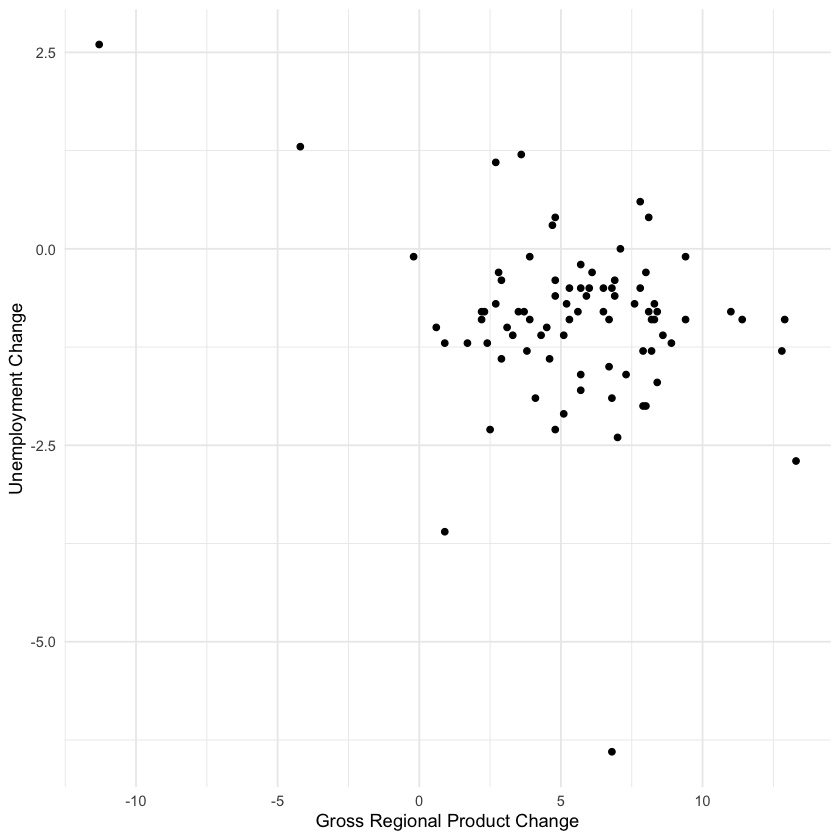

In [43]:
ggplot(df, aes(X, Y)) + 
    geom_point() + 
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Unemployment Change")

Удалим выбросы:

In [44]:
new_df <- subset(df, X > -3)
new_df <- subset(new_df, Y < 2.5)

In [45]:
new_df <- subset(new_df, Y > -3)

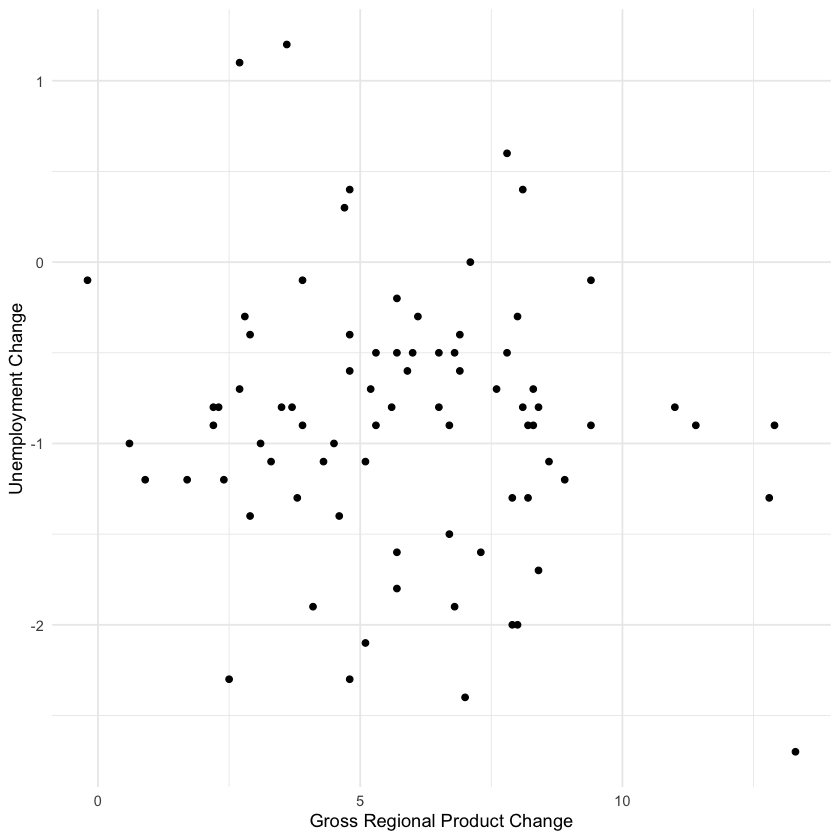

In [46]:
ggplot(new_df, aes(X, Y)) + 
    geom_point() + 
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Unemployment Change")

Оценим регрессию.

In [47]:
Y <- new_df$Y
X <- new_df$X
new_lm <- lm(Y ~ X, data=new_df)
new_lm


Call:
lm(formula = Y ~ X, data = new_df)

Coefficients:
(Intercept)            X  
   -0.65001     -0.03902  


`geom_smooth()` using formula 'y ~ x'



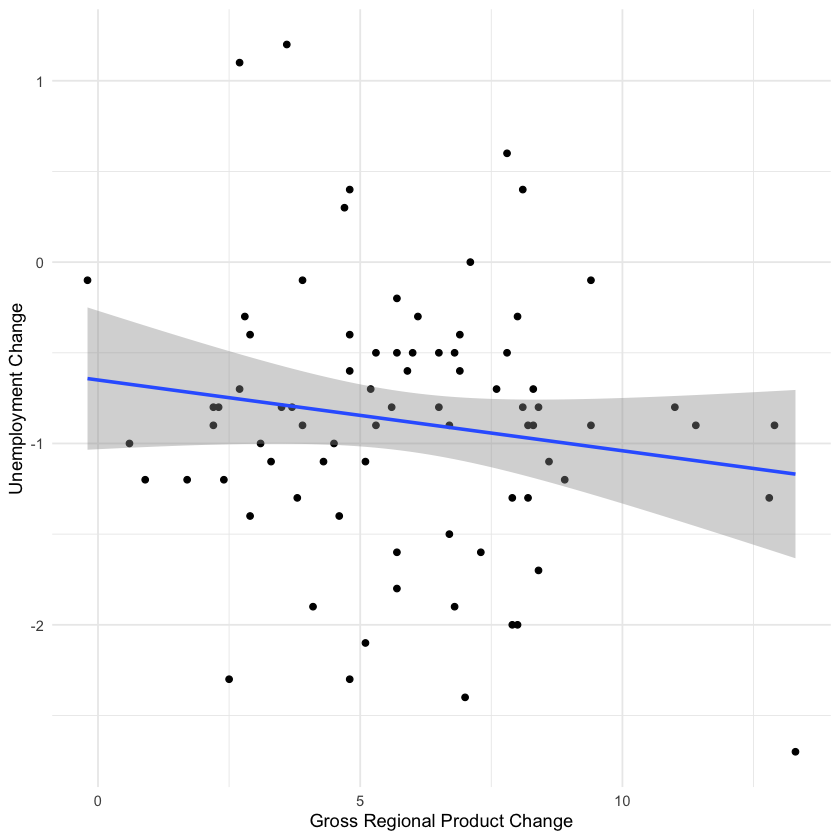

In [48]:
ggplot(new_df, aes(X, Y)) +
    geom_point() + 
    stat_smooth(method = "lm") +
    theme_minimal() +
    labs(
    x = "Gross Regional Product Change",
    y = "Unemployment Change"
    )

In [49]:
summary(new_lm)


Call:
lm(formula = Y ~ X, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55243 -0.39903  0.05537  0.37829  1.99049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.65001    0.19168  -3.391   0.0011 **
X           -0.03902    0.02944  -1.326   0.1889   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7279 on 77 degrees of freedom
Multiple R-squared:  0.02231,	Adjusted R-squared:  0.009615 
F-statistic: 1.757 on 1 and 77 DF,  p-value: 0.1889


Качество модели, исследуюя $R^2$ и его скорректированную версию, при удалении выбросов уменьшилось. Для улучшения нашей линейной регрессии нам необходимо более детально поработать с выбросами.

При проверке гипотезы об адекватности линейной регрессии мы получили F-статистику равную $1.76$ c p-value $0.189$. Таким образом, наша модель является неадекватна при любом разумном уровне значимости.

Также получили новые коэффициенты модели — $\hat{\beta}_0 \approx -0.65$ и $\hat\beta_1 \approx -0.04$, где коэффициент $\hat{\beta}_0$ значим, а $\hat{\beta}_1$ незначим при любом разумном уровне значимости.